In [66]:
#------------------- Importing the librairies -------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.metrics import classification_report

In [67]:
#--------- Create dataframes for train and test datasets ---------#

# Load the Breast Cancer dataset 
breastCancer = pd.read_csv("Data_Pam50.csv")
data = pd.DataFrame(breastCancer)

# Split the data
X = data.iloc[:,2:51].values # Data
Y_str = data.iloc[:,1].values # Target

In [68]:
# Converting string labels into numbers.
def label_convert(l):
    for i in range(len(l)):
        if l[i] == "Normal":
            l[i]=(0)
        elif l[i] == "Basal":
            l[i]=(1)
        elif l[i] == "Her2":
            l[i]=(2)
        elif l[i] == "LumA":
            l[i]=(3)
        elif l[i] == "LumB":
            l[i]=(4)
    return l

Y = label_convert(Y_str)

In [69]:
# Convert the dataframes into numpy arrays of float32
X = np.array(X, dtype = 'float32')
Y = np.array(Y, dtype = 'float32')

In [70]:
#standardisation (centrer réduire)
from sklearn.preprocessing import StandardScaler
  
std_scaler = StandardScaler().fit(X)
X = std_scaler.transform(X)
print(X)

[[-0.88872766 -1.4857304   0.77539825 ... -0.47854704 -1.7368476
  -0.84201276]
 [-0.26670134 -1.4883674   1.2337822  ...  0.14696352 -1.4622784
  -2.5154433 ]
 [ 0.46459994 -0.7051909   0.91249794 ... -0.3793282  -0.4082864
   0.21911693]
 ...
 [-0.70099896  0.25378284  0.7615498  ...  0.16907209  0.18513739
   0.81277597]
 [ 0.2227008   0.09556528  0.54689866 ...  0.76007175  0.47742084
  -0.905107  ]
 [-1.15958    -0.58037496 -1.1661555  ...  0.0914225   0.10542381
   0.96764356]]


In [71]:
# Convert X and Y into train and test data
X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state = 0)

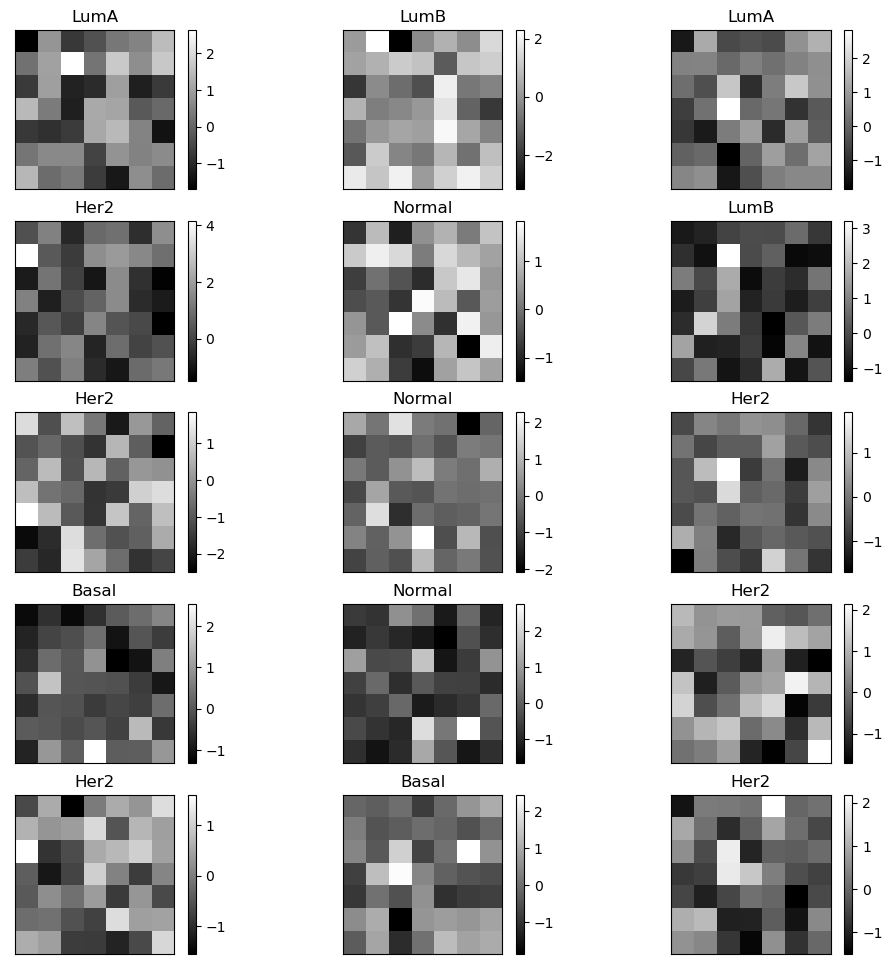

In [72]:
# Visualization of some samples ready for network training
class_names = ['Normal', 'Basal', 'Her2', 'LumA', 'LumB']
plt.figure(figsize=(12, 12))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape((7,7)), cmap='gray')
    plt.colorbar()
    label_index = int(Y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [73]:
#---------- Create the Convolutional Neural Networks ----------#

# Define the shape of the image
image_rows = 7
image_cols = 7
batch_size = 50
image_shape = (image_rows,image_cols,1) 

In [74]:
# Formating on X_train and X_test sets
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

In [75]:
# Define the model
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
])

In [76]:
# Compile the model
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer="Adam",metrics =['accuracy'])

In [77]:
# Training the model
history = cnn_model.fit(
    X_train,
    Y_train,
    batch_size=50,
    epochs=100,
    verbose=1,
    validation_data=(X_test,Y_test),
)

Epoch 1/100
2/2 [==============================] - 0s 227ms/step - loss: 1.6610 - accuracy: 0.1579 - val_loss: 1.6204 - val_accuracy: 0.1333
Epoch 2/100
2/2 [==============================] - 0s 53ms/step - loss: 1.6173 - accuracy: 0.2456 - val_loss: 1.5396 - val_accuracy: 0.2000
Epoch 3/100
2/2 [==============================] - 0s 50ms/step - loss: 1.5583 - accuracy: 0.3158 - val_loss: 1.4796 - val_accuracy: 0.2000
Epoch 4/100
2/2 [==============================] - 0s 57ms/step - loss: 1.4846 - accuracy: 0.3684 - val_loss: 1.4289 - val_accuracy: 0.4667
Epoch 5/100
2/2 [==============================] - 0s 111ms/step - loss: 1.4522 - accuracy: 0.4737 - val_loss: 1.3843 - val_accuracy: 0.6000
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 1.4123 - accuracy: 0.5088 - val_loss: 1.3432 - val_accuracy: 0.6000
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 1.3824 - accuracy: 0.5263 - val_loss: 1.3052 - val_accuracy: 0.6000
Epoch 8/100
2/2 [=

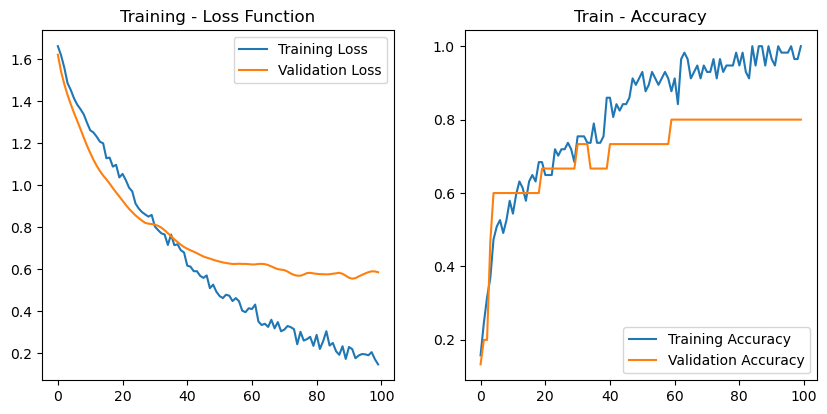

In [78]:
# Plot of the training accuracy
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

plt.show()

In [79]:
# Evaluate / Score the model
score = cnn_model.evaluate(X_test,Y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.5846
Test Accuracy : 0.8000


In [80]:
# Classification Report
num_classes = 5
epochs = 20

predicted_classes= cnn_model.predict(X_test)
actual = np.array(Y_test, dtype='int')
predicted = np.argmax(predicted_classes,axis=1)

print("")
print(f"Actual:    {actual}")
print(f"Predicted: {predicted}")
print("")

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(actual, predicted, target_names=target_names))

1/1 [==============================] - 0s 48ms/step

Actual:    [1 1 2 1 2 2 0 3 2 4 3 1 2 2 2]
Predicted: [1 1 2 1 1 2 0 3 2 2 3 1 1 2 2]

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       0.67      1.00      0.80         4
     Class 2       0.83      0.71      0.77         7
     Class 3       1.00      1.00      1.00         2
     Class 4       0.00      0.00      0.00         1

    accuracy                           0.80        15
   macro avg       0.70      0.74      0.71        15
weighted avg       0.77      0.80      0.77        15



/home/jim/.conda/envs/snow38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jim/.conda/envs/snow38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jim/.conda/envs/snow38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


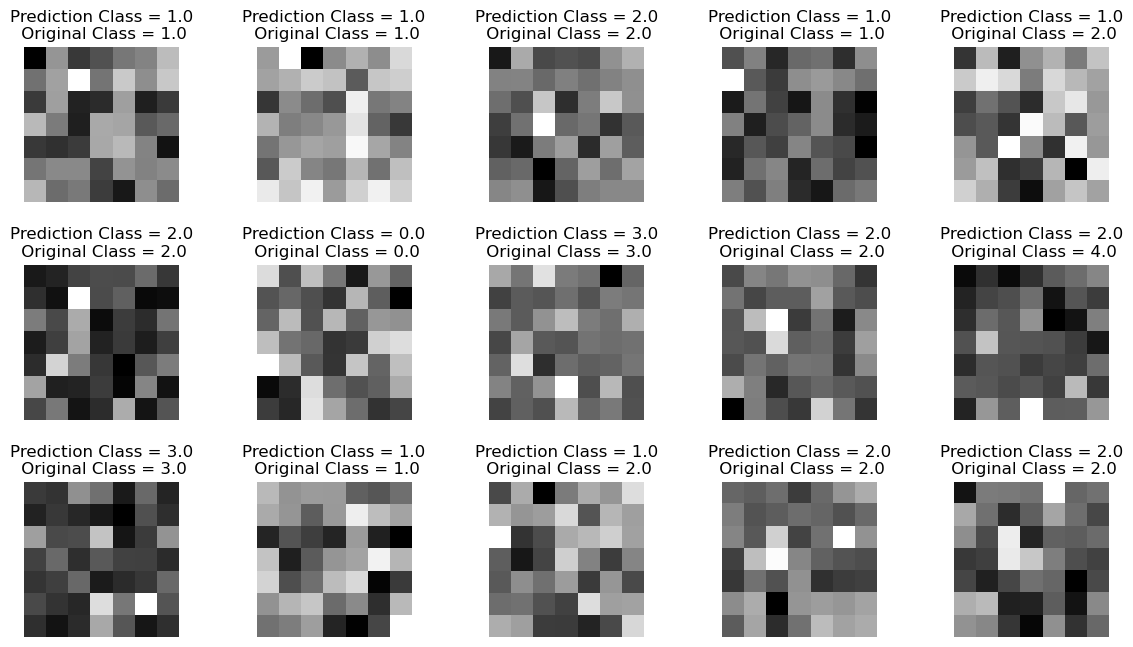

In [81]:
# Plot classification
L = 3
W = 5

fig, axes = plt.subplots(L, W, figsize = (14,8))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(7,7), cmap='gray')
    axes[i].set_title(f"Prediction Class = {predicted[i]:0.1f}\n Original Class = {Y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()